In [2]:
#Importing Libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings 
warnings.filterwarnings('ignore')

In [5]:
crop_data = pd.read_csv('../Data-Processed/crop_recomendation.csv')

In [6]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,98,57,35,20.879744,82.002744,6.502985,202.935536,rice
1,95,60,38,21.770462,80.319644,7.038096,226.655537,rice
2,90,37,37,23.004459,82.320763,7.840207,263.964248,rice
3,62,58,35,26.491096,80.158363,6.980401,242.864034,rice
4,75,46,44,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
crop_data.size

17600

In [8]:
crop_data.shape

(2200, 8)

In [9]:
crop_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [10]:
crop_data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
crop_data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [12]:
crop_data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot:>

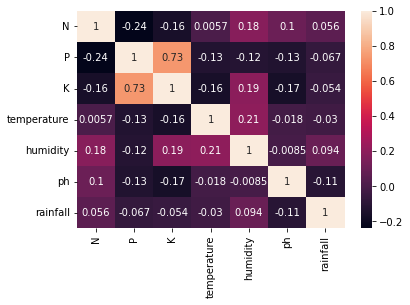

In [13]:
sns.heatmap(crop_data.corr(),annot=True)

Separating features and Target Labels

In [15]:
features = crop_data[['N','P','K','temperature','humidity','ph','rainfall']]
target = crop_data['label']
labels = crop_data['label']

In [16]:
#Initializing empty list to append model's name and corresponding name

acc = [] 
model = []

In [17]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(features,target,test_size=0.2,random_state=42)

Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=5)


In [19]:
DecisionTree.fit(Xtrain,Ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

In [20]:
predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest,predicted_values)
acc.append(x)
model.append('Decision Tree')
print('Decision Tree Accuracy is : ', x*100)
print(classification_report(Ytest,predicted_values))

Decision Tree Accuracy is :  92.04545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.65      1.00      0.78        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       1.00      0.35      0.52        23
 kidneybeans       1.00      0.80      0.89        20
      lentil       0.73      1.00      0.85        11
       maize       0.83      0.90      0.86        21
       mango       1.00      0.95      0.97        19
   mothbeans       1.00      0.46      0.63        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

In [21]:
#Cross validation score
from sklearn.model_selection import cross_val_score

In [22]:
score = cross_val_score(DecisionTree,features,target,cv=5)

In [23]:
score

array([0.92954545, 0.90681818, 0.925     , 0.91590909, 0.93181818])

Saving Trained Desision Tree Model

In [24]:
import pickle
#Dump the trained Decision Tree with pickle
DT_pkl_File = '../models/DesisionTree.pkl'
DT_pkl_model = open(DT_pkl_File,'wb')
pickle.dump(DecisionTree,DT_pkl_model)
DT_pkl_model.close()